In [78]:
!pip install scikit-posthocs


In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('WA_Marketing-Campaign.csv')
df.head(10)

MarketID MarketSize  LocationID  AgeOfStore  Promotion  week  \
0         1     Medium           1           4          3     1   
1         1     Medium           1           4          3     2   
2         1     Medium           1           4          3     3   
3         1     Medium           1           4          3     4   
4         1     Medium           2           5          2     1   
5         1     Medium           2           5          2     2   
6         1     Medium           2           5          2     3   
7         1     Medium           2           5          2     4   
8         1     Medium           3          12          1     1   
9         1     Medium           3          12          1     2   

   SalesInThousands  
0             33.73  
1             35.67  
2             29.03  
3             39.25  
4             27.81  
5             34.67  
6             27.98  
7             27.72  
8             44.54  
9             37.94

In [9]:
df.describe()


MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  
count        548.000000  
mean          53.466204  
std           16.755216  
min           17.340000  
25%           42.545000  
50%           50.200000  
75%           60.477500  
max           99.650000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [15]:
print(df.isna().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


([<matplotlib.axis.XTick at 0x15d8da01010>,
 [Text(0, 0, 'Promotion 1'),
  Text(1, 0, 'Promotion 2'),
  Text(2, 0, 'Promotion 3')])

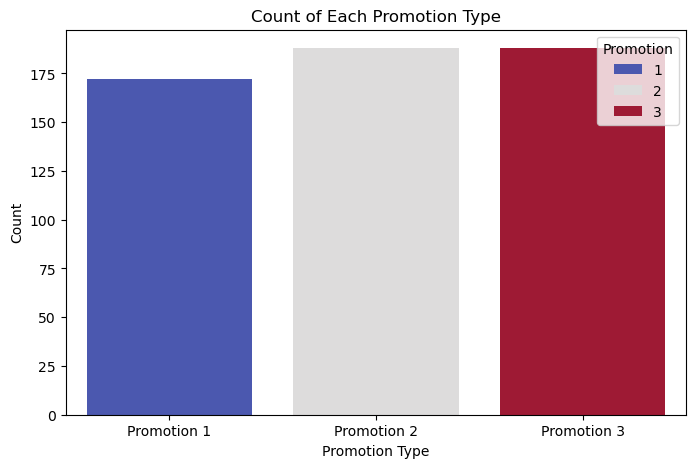

In [25]:
#we create a  count plot for each promotion 
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Promotion', data=df , hue='Promotion' , palette='coolwarm')
plt.title('Count of Each Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Promotion 1', 'Promotion 2', 'Promotion 3'] )

Each promotion type has a similar number of observations, which ensures fair comparisons and valid results.ns

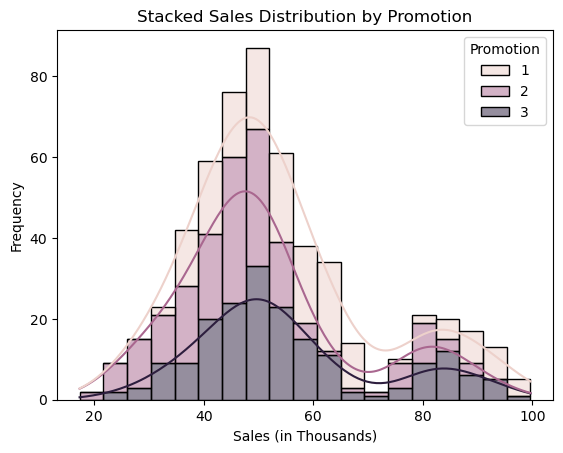

In [29]:
#kde & histogram plot to visulaes the sales made by each promotion 
sns.histplot(data=df, x='SalesInThousands', hue='Promotion', multiple='stack', kde=True)
plt.title('Stacked Sales Distribution by Promotion')
plt.xlabel('Sales (in Thousands)')
plt.ylabel('Frequency')
plt.show()

**Notes:**

- Promotion 1 :  The highest among the promotions (40-60k sales).- 
Promotion  : 2Has a  wider spread with a peak around 50-70k.- 
Promotion  : M more spread out, with consistent sales in the 30-80k range.

In [37]:
#calculating the mean sales for each promotion 
mean_sales = df.groupby('Promotion')['SalesInThousands'].mean()
print(mean_sales)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64




ANOVA is the preferred statistical method for comparing the means of multiple groups, such as different promotion types, because it allows for a simultaneous assessment of whether there are significant differences among group means. Unlike t-tests, which only compare two groups at a time, ANOVA can evaluate three or more groups without increasing the likelihood of Type I errors. This makes it an ideal choice for analyzing the impact of various promotions on sales performance, providing a comprehensive understanding of their effects in a single test.

**Hypotheses:**

- **H0:** M1 = M2 = M3 (There is no difference in the average sales across the promotions.)
- **H1:** At least one of the promotion averages is dif(Promotion 1 makes more sales than teh other promotions)ferent.

Before conducting ANOVA on the sales data across different promotions, it is essential to check that the sales data for each promotion is normally distributed and that the variances across the groups are equal.

In [55]:
# Shapiro-Wilk test for normality
shapiro_test_p1 = stats.shapiro(df[df['Promotion'] == 1]['SalesInThousands'])
shapiro_test_p2 = stats.shapiro(df[df['Promotion'] == 2]['SalesInThousands'])
shapiro_test_p3 = stats.shapiro(df[df['Promotion'] == 3]['SalesInThousands'])

print(f"Shapiro-Wilk Test for Promotion 1: {'Normal' if shapiro_test_p1.pvalue > 0.05 else 'Not Normal'}")
print(f"Shapiro-Wilk Test for Promotion 2: {'Normal' if shapiro_test_p2.pvalue > 0.05 else 'Not Normal'}")
print(f"Shapiro-Wilk Test for Promotion 3: {'Normal' if shapiro_test_p3.pvalue > 0.05 else 'Not Normal'}")


Shapiro-Wilk Test for Promotion 1: Not Normal
Shapiro-Wilk Test for Promotion 2: Not Normal
Shapiro-Wilk Test for Promotion 3: Not Normal


Since the assumptions for ANOVA are not met, you can use the Kruskal-Wallis test, a non-parametric alternative that doesn't require normality or equal variances.

In [62]:
# Perform Kruskal-Wallis test
from scipy.stats import kruskal
kruskal_result = kruskal(
    df[df['Promotion'] == 1]['SalesInThousands'],
    df[df['Promotion'] == 2]['SalesInThousands'],
    df[df['Promotion'] == 3]['SalesInThousands']
)
print(kruskal_result)

KruskalResult(statistic=53.29475169322799, pvalue=2.6741866266697816e-12)


**Interpretation:**  

  **p-value (2.67e-12):** This p-value is extremely small and much less than 0.05, which means that there is a statistically significant difference in the sales distributions among the three promotion groups.

  
**Conclusion:**  Since the p-value is so small, we reject the null hypothesis (H0), which states that there is no difference between the promotion groups. This indicates that at least one of the promotion groups has a different sales distribution compared to the others.

We will perform a post-hoc tests (like Dunn's test) to determine which specific promotion groups differ from each other.

In [82]:

from scikit_posthocs import posthoc_dunn

# performing  Dunn's test with Bonferroni correction
dunn_result = posthoc_dunn(df, val_col='SalesInThousands', group_col='Promotion', p_adjust='bonferroni')
dunn_result


1             2             3
1  1.000000e+00  6.461842e-12  1.458660e-01
2  6.461842e-12  1.000000e+00  7.083069e-07
3  1.458660e-01  7.083069e-07  1.000000e+00

By comparing the promotions P values we conclude :
 - Promotions 1 and 2 are significantly different from each other.
 - Promotions 2 and 3 are significantly different from each other.
 - Promotions 1 and 3 do not show a significant difference.